# Chapter 3

In [17]:
library(rethinking)

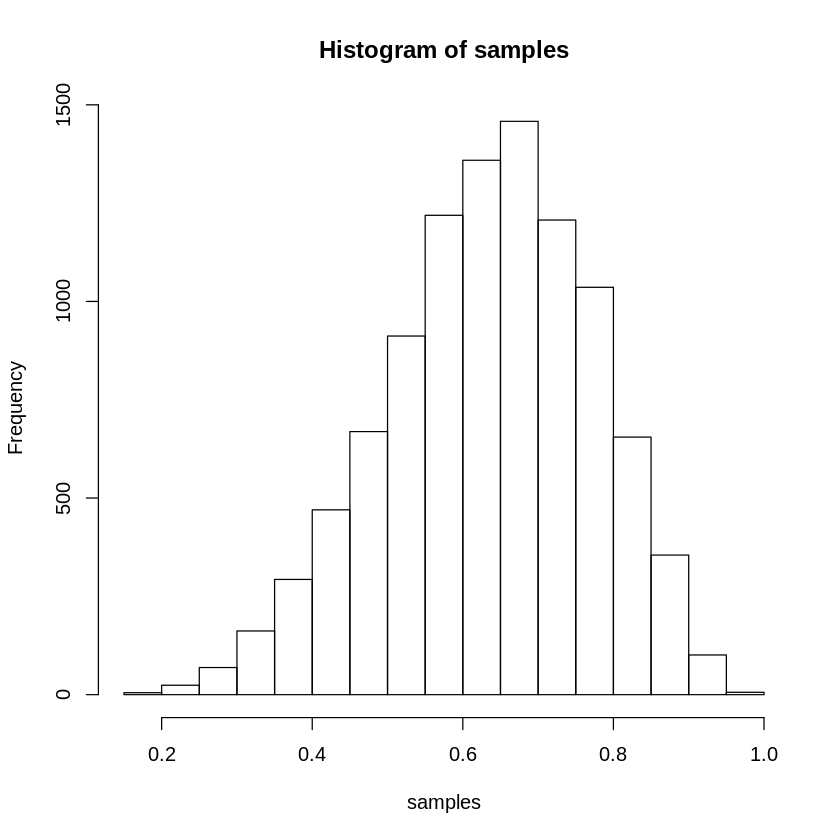

In [18]:
p_grid <- seq(from = 0, to = 1, length.out = 1000)
prior <- rep (1, 1000)
likelihood <- dbinom (6, size = 9, prob = p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample(p_grid, prob = posterior, size = 1e4, replace = TRUE)
hist(samples)

## 3E1

In [19]:
sum(samples < .2) / 1e4

[1] 5e-04

In [20]:
## 3E2

In [21]:
sum(samples > .8) / 1e4

[1] 0.1117

In [22]:
## 3E3

In [23]:
sum(samples < .8 & samples > .2) / 1e4

[1] 0.8878

In [24]:
## 3E4

In [25]:
quantile(samples, .2)

20% 
0.5195195

In [26]:
## 3E5

In [27]:
d <- quantile(samples, .8)
d

80% 
0.7567568

In [28]:
## 3E6

In [29]:
HPDI(samples, .66)

|0.66     0.66| 
0.5205205 0.7847848

In [30]:
## 3E7

In [31]:
quantile(samples , c(.17, .83))

17%       83% 
0.5005005 0.7687688

In [32]:
PI(samples , .66)

17%       83% 
0.5005005 0.7687688

In [33]:
## 3M1

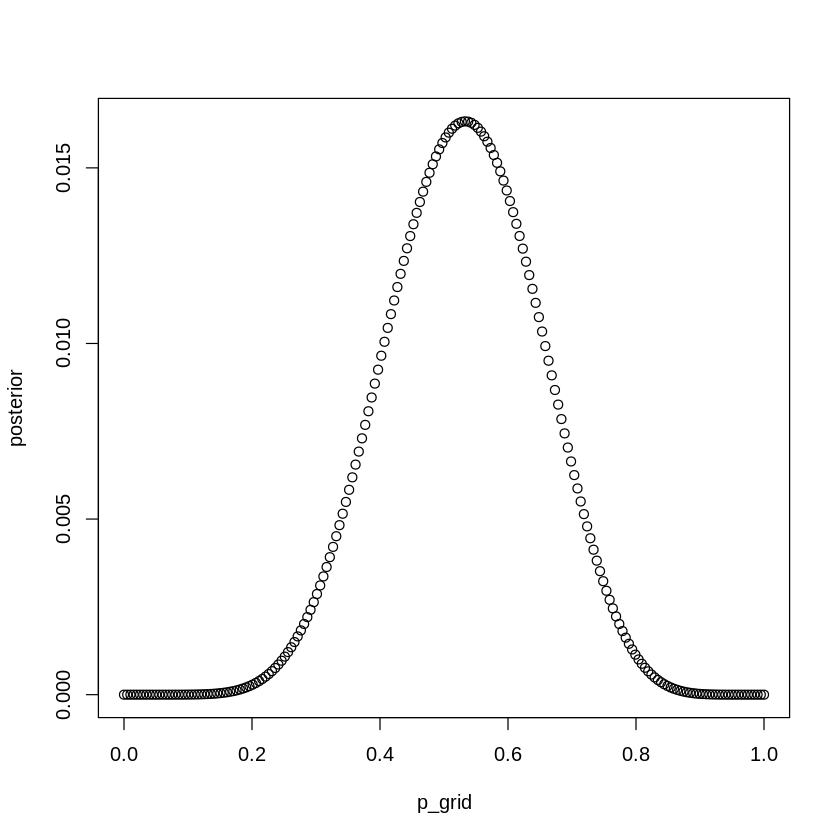

In [58]:
p_grid <- seq(from = 0, to = 1, length.out = 200)
prior <- rep(1,20)
likelihood <- dbinom(x = 8, size = 15, prob = p_grid)
unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)
plot(p_grid,posterior)

In [35]:
## 3M2

In [36]:
samples <- sample(p_grid, prob = posterior, size = 1e4, replace = TRUE)
HPDI(samples, .9)

|0.9      0.9| 
0.3157895 0.6842105

In [37]:
## 3M3

[1] 0.1445

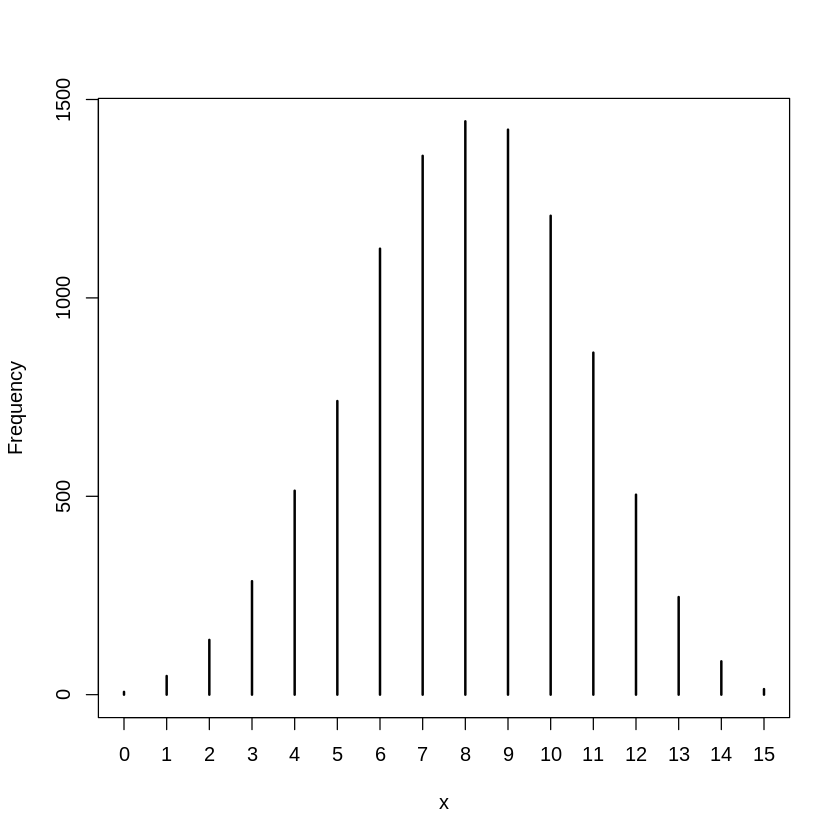

In [38]:
w <- rbinom(10000, size=15, prob = samples)
simplehist(w)
prob_8 <- sum(w == 8) / 1e4
prob_8

In [39]:
## 3M4

In [40]:
w9 <- rbinom(10000, size=9, prob = samples)
prob_6 <- sum(w9 == 6) / 10000
prob_6

[1] 0.1726

In [41]:
## 3M5

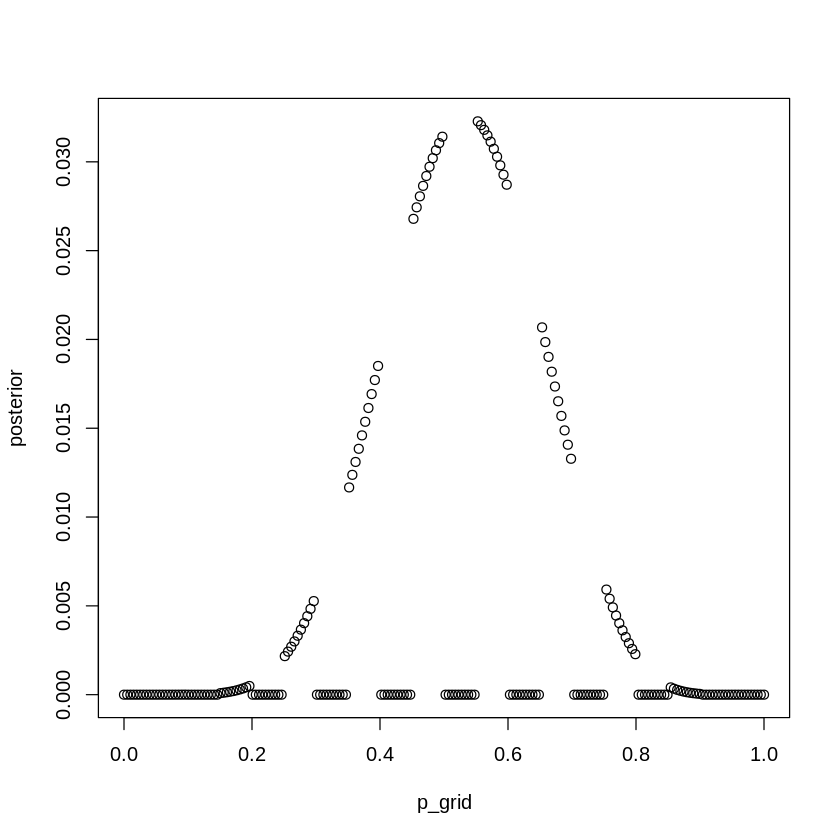

In [57]:
p_grid <- seq(from = 0, to = 1, length.out = 200)
prior <- c(rep(0,10), rep(1,10))
likelihood <- dbinom(x = 8, size = 15, prob = p_grid)
unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)
plot(p_grid,posterior)

In [43]:
samples <- sample(p_grid, prob = posterior, size = 1e4, replace = TRUE)
HPDI(samples, .9)

|0.9      0.9| 
0.5263158 0.6842105

[1] 0.1591

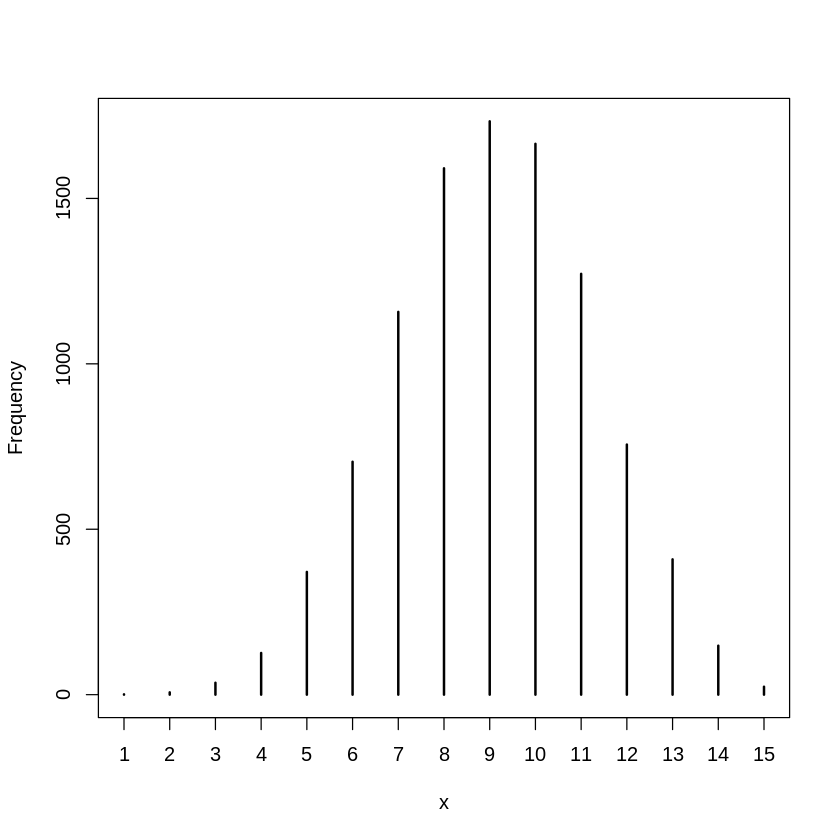

In [44]:
w <- rbinom(10000, size=15, prob = samples)
simplehist(w)
prob_8 <- sum(w == 8) / 1e4
prob_8

In [45]:
w9 <- rbinom(10000, size=9, prob = samples)
prob_6 <- sum(w9 == 6) / 10000
prob_6

[1] 0.2373

In [46]:
## 3H1

[1] 111

[1] 0.5555556

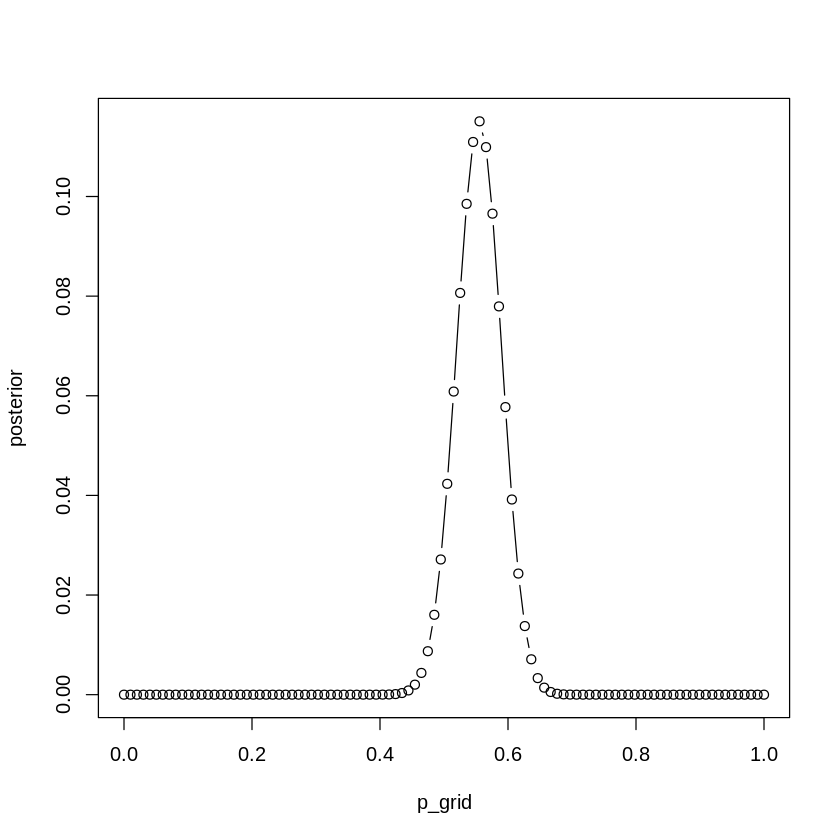

In [47]:
library(rethinking)
data(homeworkch3)
sum(birth1) + sum(birth2)

p_grid <- seq(from = 0, to = 1, length.out = 100)
prior <- rep(1, 100)
likelihood <- dbinom (111, size = 200, prob = p_grid)
unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)
plot(p_grid, posterior, type = "b" )

p_grid[which.max(posterior)]

In [48]:
## 3H2

In [49]:
samples <- sample(p_grid, size = 10000, replace = TRUE, prob = posterior)
HPDI(samples, prob= .5)
HPDI(samples, prob = .89)
HPDI(samples, prob = .97)

|0.5      0.5| 
0.5454545 0.5858586

|0.89     0.89| 
0.4949495 0.6060606

|0.97     0.97| 
0.4848485 0.6262626

In [50]:
## 3H3

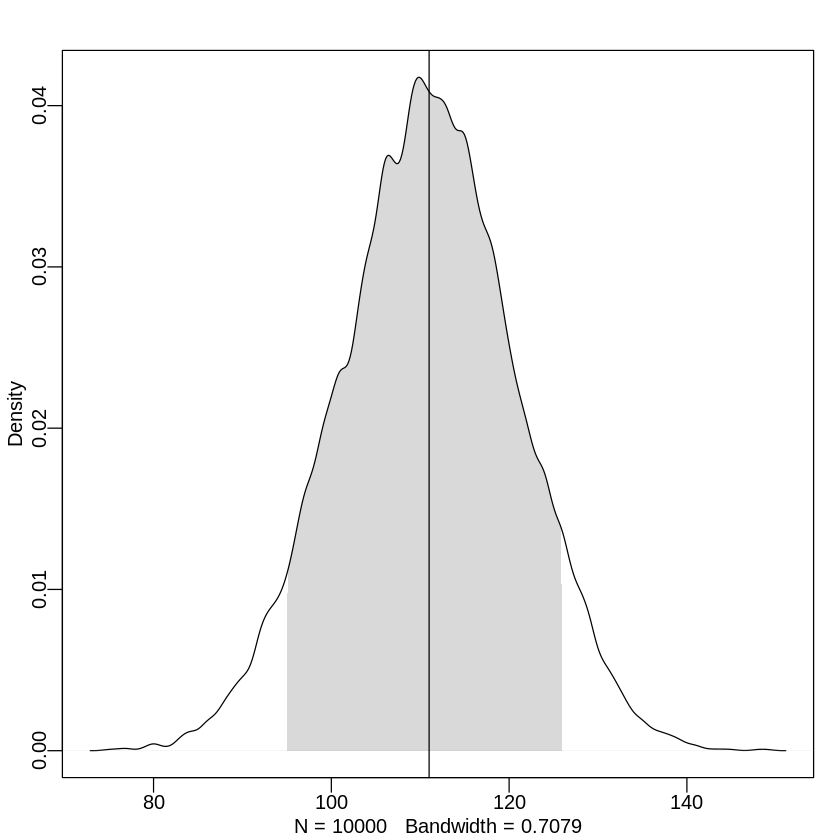

In [51]:
s <- rbinom(10000, 200, samples)
#sampls <- data.frame(xx = c(s,samples), yy = rep(letters[1:2],each = 10000))
#ggplot(sampls, aes(x=xx, fill=yy)) + geom_histogram(position="identity", alpha=0.2)
dens(s, show.HPDI=.89)
abline(v=sum(c(birth1, birth2)))

In [52]:
#### The constructed posterior distribution is wider 

In [53]:
## 3H4

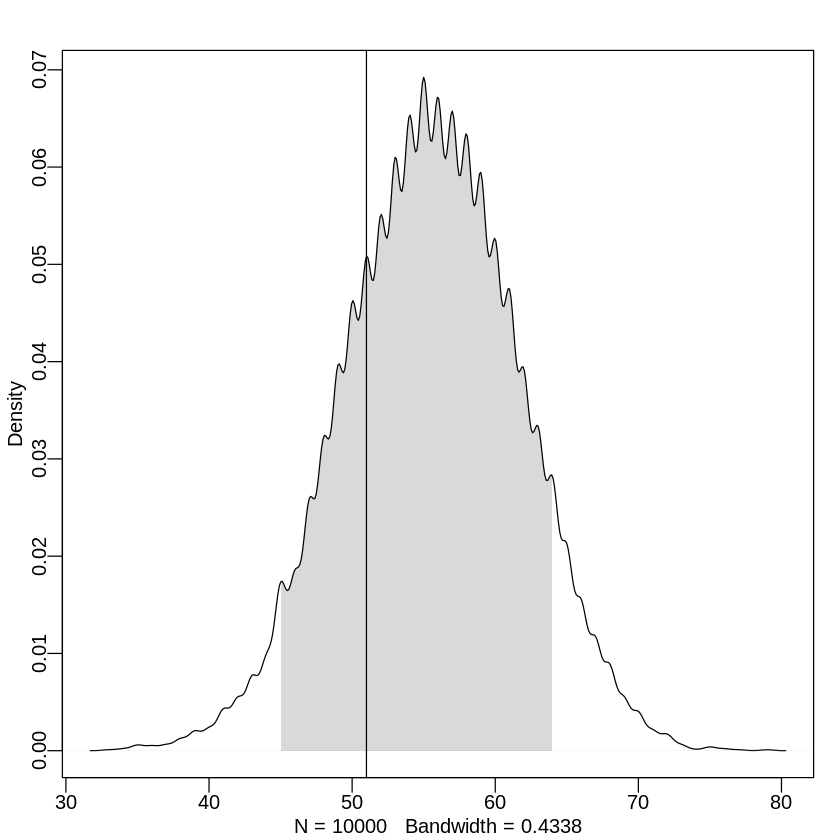

In [54]:
s <- rbinom(10000, 100, samples)
#hist(s)
dens(s, show.HPDI=.89)
abline(v=sum(birth1))

## 3H5
Count number of first borns who were girls

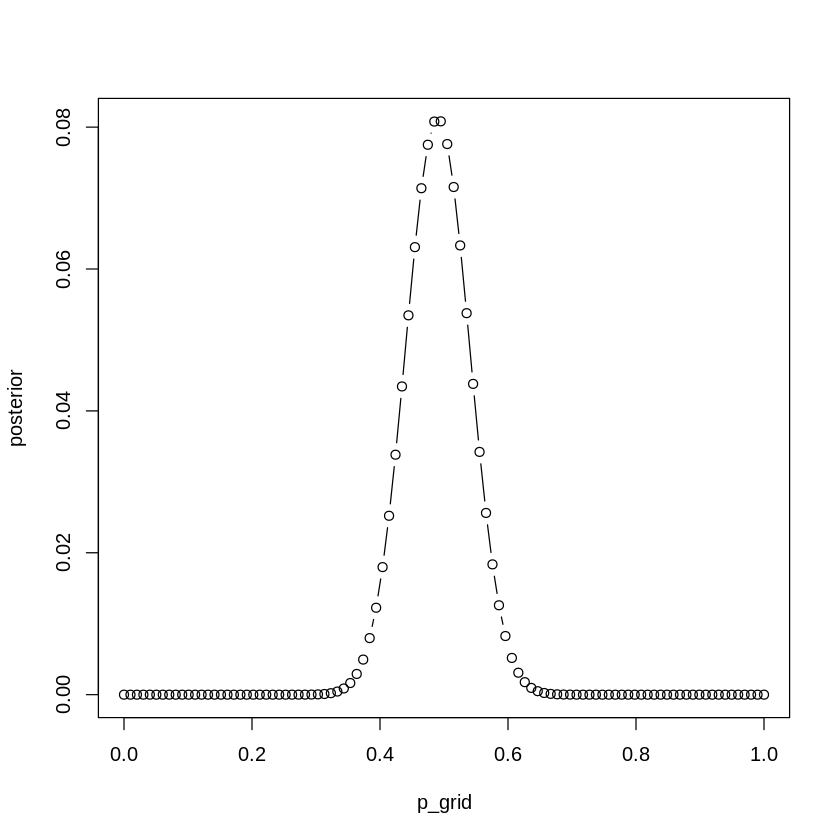

In [55]:
first_born_girls <- sum(birth1 == 0)
p_grid <- seq(from = 0, to = 1, length.out = 100)
prior <- rep(1, 100)
likelihood <- dbinom (first_born_girls, size = 100, prob = p_grid)
unstd.posterior <- likelihood * prior
posterior <- unstd.posterior / sum(unstd.posterior)
plot(p_grid, posterior, type = "b" )

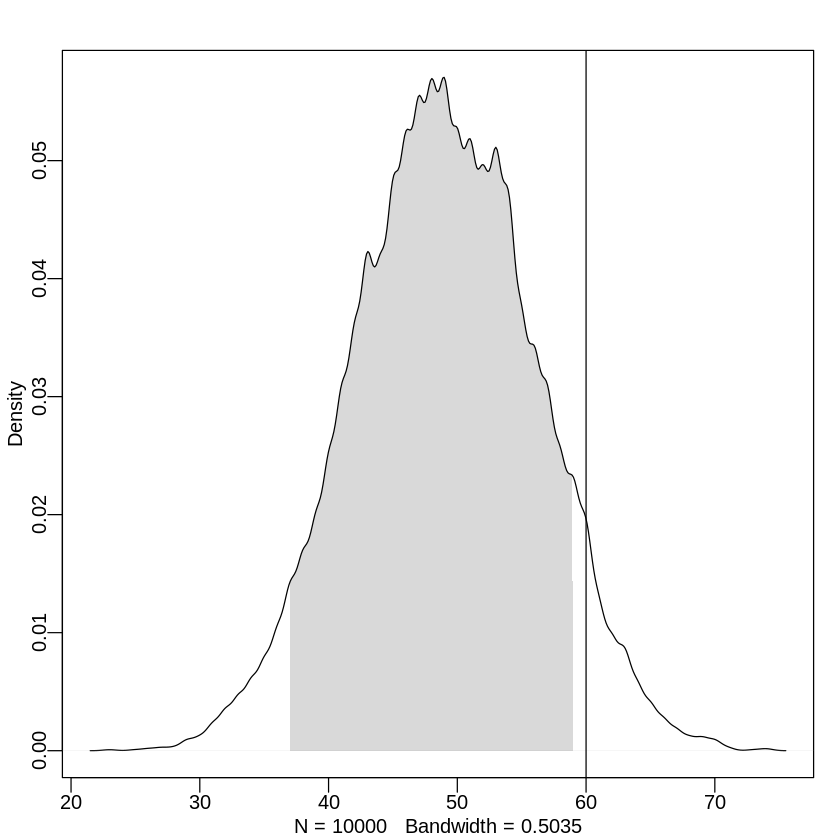

In [56]:
samples <- sample(p_grid, size = 10000, replace = TRUE, prob = posterior)
s <- rbinom(10000, 100, samples)
dens(s, show.HPDI=.89)
abline(v=sum(birth2))


If they get a boy the first time they stop getting more children and then they will not be part of this group (hm, does this logic work?)